In [ ]:
import os
os.getcwd()

#permission to access drive of linked account
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#uploading the dataset zip file to google colab drive
from google.colab import files
files.upload()

!unzip titanic.zip

Mounted at /content/gdrive


Saving titanic.zip to titanic.zip
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


**MAJOR STEPS IN DATA PREPROCESSING**

1. Data Cleaning : Work to clean the data by filling in missing values, smoothing noisy data, identifying or removing outliers, and resolving inconsistencies.


2. Data Integration : 
 

3. Data Reduction : Obtains a reduced representation of th edata set that is much smaller in volume, yet produces the same (or almost same) analytical results. [ Data Reduction strategies includes : *Dimensionality Reduction & Numerosity Reduction*

Dimensionlality Reduction : Data encoding schemes are applied so as to obtain reduced or "compressed" representation of the original data.
*Example includes **data compression techniques** (e.g., Wavelet Transforms & Principle Component Analysis), and **attribute construction** (e.g., where a small set of most useful attributes is derived from the original set*

**Numerosity Reduction** : the data are replaced by alternative, smaller representations using 

**A) Parametric models** (e.g., regression or log-linear models) or

 **B) Nonparametric models** (e.g., histograms, clusters, sampling, or data aggregation) 

4. Data Tranformation ( Normalization, Data Discretization, Concept Hierarchy Generation)
 Discretization and Concept Hierarchy Generation: can be useful, where raw values for attributes are replaced by ranges or higher conceptual levels.
For example, raw values for age may be replaced by higher-level concepts such as youth, adult, or senior.

Discretization and Concept Hierarchy generation are powerful tools for data mining in that they allow data mining at multiple abstraction levels.


Normalization, data discretization, and concept hierarchy generation are forms of **Data Transformation**


NOTE : previous categorization is not mutually exclusive. For example, the removal of redundant data may be seen as a form of data cleaning, as well as data reduction




**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#reading the data from file
train = pd.read_csv("train.csv")
print(train.head())
#train dataframe size
print("\n\nShape is : ",train.shape,"\n\n")
#printing the columns 
print("Columns in dataframe : \n",list(train.columns))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  




In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


After analysing above output we can conclude that we have to perform Data Cleaning for missing columns values :

Age [4]: 714

Cabin [9]: 204

Embarked [10]: 889

In [ ]:
#let’s look at a numerical summary of each attribute through describe:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**DATA CLEANING**

In [ ]:
print(train['Cabin'].unique())
print(len(train['Cabin'].unique()))
train.drop('Cabin', axis=1, inplace = True)

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
148


From the above line output we can observe that there are 148 differnt classes in attribute "Cabin".

And as we have previously found that there are only 204 non-null values in the same attribute i.e, 71% of the data is missing in the column. So it is best to drop the column.

From the graph of Age vs count we can observe that majority of passengers are in age group 20-38. So we will use mean value = 29.7 for filling missing data

UNIQUE VALUES IN AGE 
 [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]

No. of Unique Values : 89
       Count
Age         
0.42       1
0.67       1
0.75       2
0.83       2
0.92       1
...      ...
70.00      2
70.50      1
71.00      2
74.00      1
80.00      1

[88 rows x 1 columns]
count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


Text(0, 0.5, 'Count')

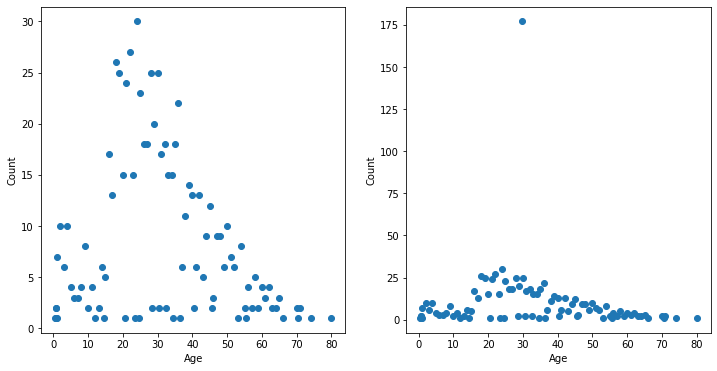

In [ ]:
print("UNIQUE VALUES IN AGE \n", train['Age'].unique())
print("\nNo. of Unique Values :", len(train['Age'].unique()))

plt.figure(figsize=(12,6))

#Metrix and graph of Age attribute before filling out missing values
age = train.groupby(['Age'])['Age'].count().to_frame()
age.rename(columns = {'Age':'Count'}, inplace = True)
print(age)
plt.subplot(1,2,1)
plt.scatter(age.index,age['Count'])
plt.xlabel('Age')
plt.ylabel('Count')

train['Age'].fillna(train['Age'].mean(),inplace=True)

#Metrix and graph of Age attribute after filling out missing values
print(train['Age'].describe())
age = train.groupby(['Age'])['Age'].count().to_frame()
age.rename(columns = {'Age':'Count'}, inplace = True)
plt.subplot(1,2,2)
plt.scatter(age.index,age['Count'])
plt.xlabel('Age')
plt.ylabel('Count')

In Embarked attribute we will be replacing the missing values with 'S', which has the maximum frequency

In [ ]:
#INITIAL VALUES OF Embarked
print("INITIAL UNIQUE VALUES : ",train['Embarked'].unique(),"\n")
print("No. Of Unique Values : ",len(train['Embarked'].unique()),"\n")
print("Different values for Embarked:\n",train['Embarked'].describe(),"\n")
Embarked = train.groupby(['Embarked'])['Embarked'].count().to_frame()
print("Unique Values Count:\n",Embarked,"\n\n")

train['Embarked'].fillna('S',inplace=True)

#FINAL VALUES OF Embarked
print("FINAL UNIQUE VALUES : ",train['Embarked'].unique(),"\n")
print("No. Of Unique Values : ",len(train['Embarked'].unique()),"\n")
print("Different values for Embarked:\n",train['Embarked'].describe(),"\n")
Embarked = train.groupby(['Embarked'])['Embarked'].count().to_frame()
print("Unique Values Count:\n",Embarked,"\n\n")

INITIAL UNIQUE VALUES :  ['S' 'C' 'Q' nan] 

No. Of Unique Values :  4 

Different values for Embarked:
 count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object 

Unique Values Count:
           Embarked
Embarked          
C              168
Q               77
S              644 


FINAL UNIQUE VALUES :  ['S' 'C' 'Q'] 

No. Of Unique Values :  3 

Different values for Embarked:
 count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object 

Unique Values Count:
           Embarked
Embarked          
C              168
Q               77
S              646 




We can clearly observe that no data is missing.

In [ ]:
t=train

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**DATA INTEGRATION & REDUCTION**

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
#name column has no relevance as we have already have PassengerId
train.drop('Name',axis=1,inplace=True)

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Ticket', 'Fare', 'Embarked']

In [ ]:
#Finding unique values in all columns
for feature in features:
  print(feature, " : ", train[feature].unique(),"\n")

Pclass  :  [3 1 2] 

Sex  :  ['male' 'female'] 

Age  :  [22.         38.         26.         35.         29.69911765 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         34.         15.         28.
  8.         19.         40.         66.         42.         21.
 18.          3.          7.         49.         29.         65.
 28.5         5.         11.         45.         17.         32.
 16.         25.          0.83       30.         33.         23.
 24.         46.         59.         71.         37.         47.
 14.5        70.5        32.5        12.          9.         36.5
 51.         55.5        40.5        44.          1.         61.
 56.         50.         36.         45.5        20.5        62.
 41.         52.         63.         23.5         0.92       43.
 60.         10.         64.         13.         48.          0.75
 53.         57.         80.         70.         24.5         6.
  0.67       30.5         0.42

From the above output we can interpret that we have to either categorize or drop the columns : ['Age','Ticket','Fare']


count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


Text(0, 0.5, 'Count')

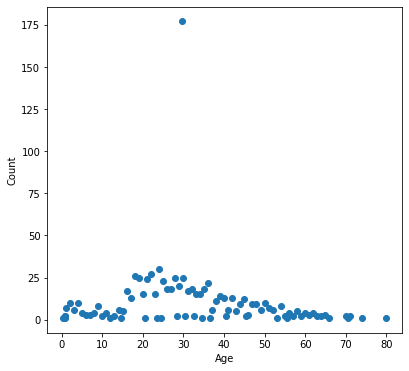

In [ ]:
#Matrix values and graph of Age attribute 

print(train['Age'].describe())
age = train.groupby(['Age'])['Age'].count().to_frame()
age.rename(columns = {'Age':'Count'}, inplace = True)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(age.index,age['Count'])
plt.xlabel('Age')
plt.ylabel('Count')

In [ ]:
#In the above graph, the attribute 'Age' can be categorize in 4 categories [0-20,20-40,40-60,60-80]
bins = [0,20,40,60,80]
labels = ['Young', 'Young adult', 'Adult','Old']
train['Age'] = pd.cut(train['Age'],bins,labels=labels)

             Ticket
Ticket             
110152            3
110413            3
110465            2
110564            1
110813            1
...             ...
W./C. 6608        4
W./C. 6609        1
W.E.P. 5734       1
W/C 14208         1
WE/P 5735         2

[681 rows x 1 columns]


Text(0, 0.5, 'Count')

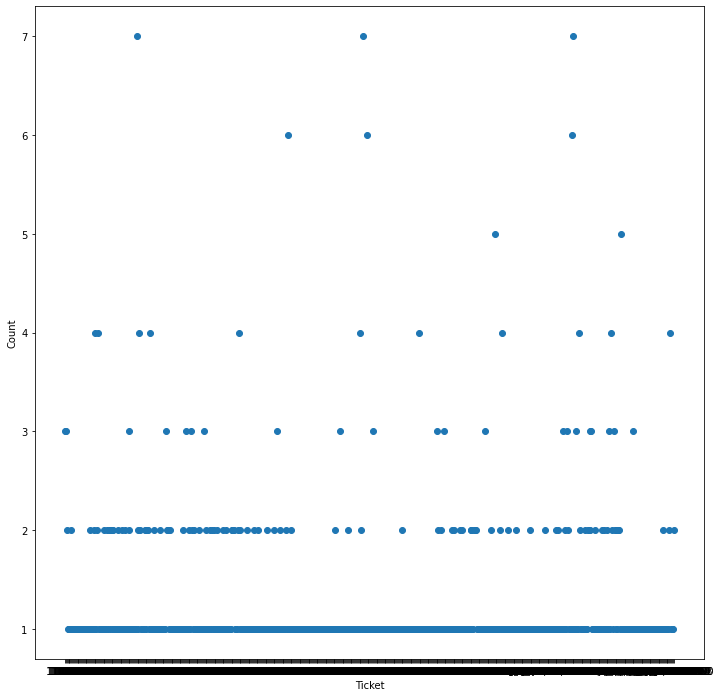

In [ ]:
#Ticket attribute has 681 unique values
ticket = train.groupby(['Ticket'])['Ticket'].count().to_frame()
print(ticket)
plt.figure(figsize=(12,12))
plt.scatter(ticket.index,ticket['Ticket'])
plt.xlabel('Ticket')
plt.ylabel('Count')


          Fare
Fare          
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
...        ...
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3

[248 rows x 1 columns]


Text(0, 0.5, 'Count')

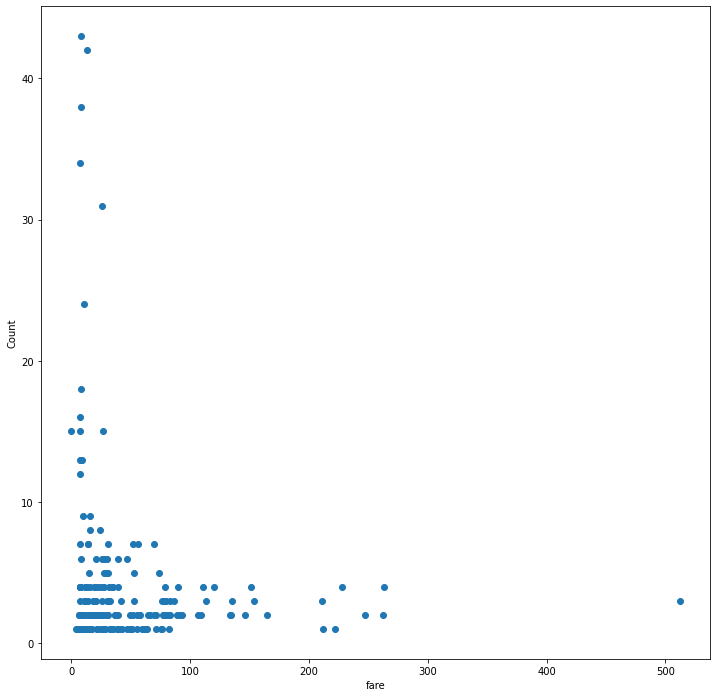

In [ ]:
# Fare attribute has 248 unique values.
fare = train.groupby(['Fare'])['Fare'].count().to_frame()
print(fare)
plt.figure(figsize=(12,12))
plt.scatter(fare.index,fare['Fare'])
plt.xlabel('fare')
plt.ylabel('Count')

From the above two graphs it is clear that attribute "Ticket" and "Fare" cannot be categoried as it has a considerable amount of unique values. So, these both attributes will be dropped from the dataframe.



In [ ]:
#droping the 'Ticket' and 'Fare' column
train.drop(['Ticket','Fare'], axis=1, inplace=True)

-----------------------------------------------------------

In [ ]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,Young adult,1,0,S
1,2,1,1,female,Young adult,1,0,C
2,3,1,3,female,Young adult,0,0,S
3,4,1,1,female,Young adult,1,0,S
4,5,0,3,male,Young adult,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,Young adult,0,0,S
887,888,1,1,female,Young,0,0,S
888,889,0,3,female,Young adult,1,2,S
889,890,1,1,male,Young adult,0,0,C


In [ ]:
#Saving the training file
train.to_csv('/content/gdrive/MyDrive/Colab Notebooks/titanic.csv', index = False)

In [ ]:
x_train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/titanic.csv')

#splitting the train datset into training attributes and target attribute
y_train = x_train[['Survived']]
x_train.drop(['Survived'], axis=1, inplace = True)

**DATA TRANSFORMATION**

In [ ]:
#frequency of unique values each attribute contains
for feature in ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']:
  print(feature, " : \n", x_train.groupby([feature])[feature].count().to_frame(),"\n")
  print("-------------------------")

Pclass  : 
         Pclass
Pclass        
1          216
2          184
3          491 

-------------------------
Sex  : 
         Sex
Sex        
female  314
male    577 

-------------------------
Age  : 
              Age
Age             
Adult        128
Old           22
Young        179
Young adult  562 

-------------------------
SibSp  : 
        SibSp
SibSp       
0        608
1        209
2         28
3         16
4         18
5          5
8          7 

-------------------------
Parch  : 
        Parch
Parch       
0        678
1        118
2         80
3          5
4          4
5          5
6          1 

-------------------------
Embarked  : 
           Embarked
Embarked          
C              168
Q               77
S              646 

-------------------------


Reference: https://www.youtube.com/watch?v=Wb2Tp35dZ-I&ab_channel=codebasics

In [ ]:
test = pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
#Data pre-processing of test dataset 

attributes = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
test['Age'].fillna( 29.699118,inplace=True)

#the attribute 'Age' can be categorize in 4 categories [0-20,20-40,40-60,60-80]
bin = [0,20,40,60,80]
labels = ['Young', 'Young adult', 'Adult','Old']
test['Age'] = pd.cut(test['Age'], bin,labels=labels)

In [ ]:
#Saving the test file
train.to_csv('/content/gdrive/MyDrive/Colab Notebooks/titanic_test.csv', index = False)

**Naive Bayes Model Required Functions**

group_by_target_class(x,y)  : Group the data rows under each class 0 or 1 in dictionary eg: sur[0] and sur[1]

make_prediction(prob) : returns the class with highest probability

naive_bayes(x_train,y_train)

predict(test,info)

predict(test,info)

In [ ]:
#Group the data rows under each class 0 or 1 in dictionary eg: sur[0] and sur[1]
def group_by_target_class(x,y):
  #converting the target column to series
  y = y.squeeze()
  #dividing the training data by y_train/target attribue unique values
  m = x.groupby((y))
  sur = {}
  for value,df in m:
    sur[value]=df

  return sur

#-----------------------------

# returns the class with highest probability
def make_prediction(prob):
  max=0
  c = 0
  for t,r in prob.items():
    if(r>max): 
      max=r
      c=t
  return c

#-----------------------------

def naive_bayes(x_train,y_train):

  sur = group_by_target_class(x_train,y_train)
  size = len(x_train.columns)
  attributes = list(x_train.columns)[1:size]

  #PRIOR PROBABILITY
  p_prob={}
  for classValue,classSummaries in sur.items():
    print(classValue,classSummaries.shape[0])
    val = classSummaries.shape[0]/len(y_train) #P(classValue) | Prior Probability 
    p_prob[classValue]=val

  info = [sur,p_prob,attributes]

  return info

#-----------------------------

def predict(test,info):
  
  sur = info[0]
  p_prob = info[1]
  attributes = info[2]

  #Computing Likelihood
  values = []

  for i in list(range(test.shape[0])):

    lis = test.iloc[i][attributes] #single test case values
    prob = {}

    for classValue,classSummery in sur.items():

      pprob = p_prob[classValue] #prior probability
      prob[classValue] = 1 #likelihood probability initialization

      for feature in attributes:
        #den = train.groupby([feature])[feature].count().to_frame()
        sur_a = sur[classValue]
        numerator = len(sur_a[sur_a[feature] == lis[feature]])
        likelihood = (numerator+1)/(sur[classValue].shape[0] + len(attributes))
        prob[classValue] = prob[classValue] * likelihood

      prob[classValue] = prob[classValue] * pprob
      print(prob[classValue],classValue)


    values.append((test['PassengerId'][i],make_prediction(prob)))
    print(values)
  return values

#-----------------------------

# Accuracy
def accuracy_cal (test,pred):
  count = 0
  for i in list(range(len(test))):
    if(test['Survived'][i] == pred['Survived'][i] and test['PassengerId'][i] == pred['PassengerId'][i]):
      count = count + 1

  return count/float(len(test))*100


  

In [ ]:
s = naive_bayes(x_train,y_train)
val = predict(test,s)

0 549
1 342
0.011278476386757226 0
0.000899443932495802 1
[(892, 0)]
0.0009529963133435075 0
0.0018003510635910508 1
[(892, 0), (893, 1)]
0.0001489900126277933 0
1.921142380088121e-05 1
[(892, 0), (893, 1), (894, 0)]
0.10056641444858526 0
0.006383150488679885 1
[(892, 0), (893, 1), (894, 0), (895, 0)]
0.0005228848478616306 0
0.002051078687831735 1
[(892, 0), (893, 1), (894, 0), (895, 0), (896, 1)]
0.0275293536758697 0
0.0025718518959244193 1
[(892, 0), (893, 1), (894, 0), (895, 0), (896, 1), (897, 0)]
0.001971929773377595 0
0.0019133625473092514 1
[(892, 0), (893, 1), (894, 0), (895, 0), (896, 1), (897, 0), (898, 0)]
0.0007857462034073192 0
0.0007070670120445583 1
[(892, 0), (893, 1), (894, 0), (895, 0), (896, 1), (897, 0), (898, 0), (899, 0)]
0.0008546865079211085 0
0.002337622078626179 1
[(892, 0), (893, 1), (894, 0), (895, 0), (896, 1), (897, 0), (898, 0), (899, 0), (900, 1)]
0.004032738424003419 0
0.00042352657270861797 1
[(892, 0), (893, 1), (894, 0), (895, 0), (896, 1), (897, 0),

In [ ]:
#converting the predicted output to dataframe
data = val
pred_val = pd.DataFrame(data, columns=['PassengerId',	'Survived'])
print(pred_val)

# Opening test result file
real_val = pd.read_csv('gender_submission.csv')

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [ ]:
print(accuracy_cal(real_val,pred_val))

86.1244019138756
